In [1]:
import polars as pl
benchmarks = pl.read_parquet('../data/benchmarks_nx.parquet')
factors = pl.read_parquet('../data/factors_nx.parquet')
targets = pl.read_parquet('../data/targets_nx.parquet')

In [2]:
import sys
sys.path.append('../')
import nebular_xplorer as nx

key_name = ['date', 'code']
full_data = nx.utils.prepare(factors, targets)
return_table = nx.utils.getReturnTable(full_data, 'factor1', '1d_forward_return',benchmarks)
metrics = nx.stat.metrics(full_data)
metrics_table = nx.stat.summaryMetrics(metrics)

[  Prepare(nx)  ]2024-08-19 19:26:20 | utils.py:nebular_xplorer.utils:prepare:28 | 5494 0:00:01.111415  
 └──── INFO: 
    Nx full data prepared from 20200102 to 20201231.
    Shape: (915277, 5)
    Days: 243 
    Num of avg codes: 3766


<Figure size 640x480 with 0 Axes>

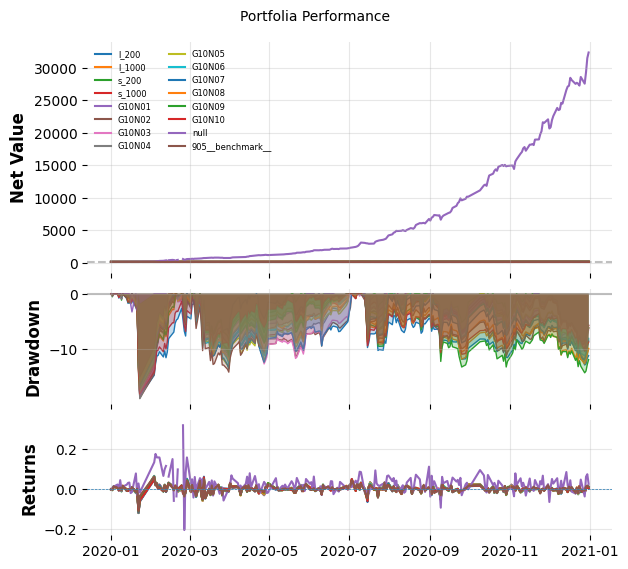

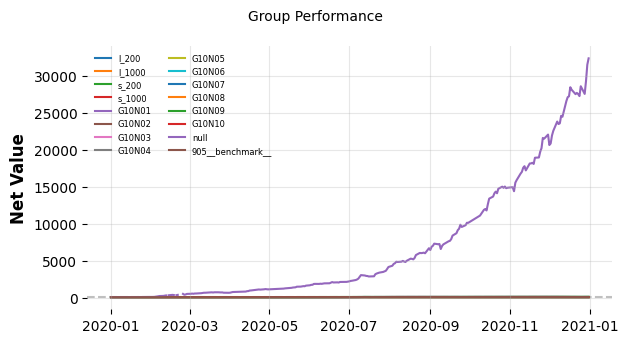

In [3]:
fig = nx.plots.snapshot(return_table)
fig2 = nx.plots.groupNav(return_table)

In [90]:
import io
import matplotlib.pyplot as plt
def _enbed_plot(fig):
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=300)
    plt.close()
    buf.seek(0)
    return buf
html = nx.report.HtmlTpl()
html.addElement('NebulaXplorer.', "{{author}}")
html.addElement('Factor Report','{{title}}')
fig1 = nx.plots.groupNav(return_table[[x for x in return_table.columns if x.startswith('G')]])
html.addFigure(_enbed_plot(fig1), '{{fig1}}')
fig2 = nx.plots.returnHeatMap(return_table)
html.addFigure(_enbed_plot(fig2), '{{fig2}}')
fig3 = nx.plots.ic(metrics.iloc[:,:1])
html.addFigure(_enbed_plot(fig3), '{{fig3}}')
fig4 = nx.plots.icHeatMap(metrics.iloc[:,:1])
html.addFigure(_enbed_plot(fig4), '{{fig4}}')
return_stats  = nx.stat.getPortStat(return_table).T
import re
def findMaxGroup(cols):
    pattern = re.compile(r'G(\d{2})N\1')
    matching_elements = [item for item in cols if pattern.match(item)]
    return matching_elements

def findMinGroup(cols):
    pattern = re.compile(r'G(\d{2})N01')
    matching_elements = [item for item in cols if pattern.match(item)]
    return matching_elements

def findBenchmark(cols):
    pattern = re.compile(r'.*__benchmark__$')
    matching_elements = [item for item in cols if pattern.match(item)]
    return matching_elements
max_group = findMaxGroup(return_stats.columns)
min_group = findMinGroup(return_stats.columns)
benchmark = findBenchmark(return_stats.columns)
return_stats = return_stats[max_group + min_group + benchmark]
return_stats.columns = ['Max Group', 'Min Group', *[x.replace("__benchmark__", "") for x in findBenchmark(return_stats.columns)]]
html.addTable(return_stats, '{{table1}}')
html.addTable(nx.stat.summaryMetrics(metrics).T
, '{{table2}}')
html.addTable(nx.stat.worstdd(return_table[min_group], 5), '{{table3}}', showindex=False)
fig5 = nx.plots.ddNav(return_table[min_group])
html.addFigure(_enbed_plot(fig5), '{{fig5}}')
html.save('report.html')

<Figure size 640x480 with 0 Axes>